# UIDAI Aadhaar Enrolment Data Analysis

## Project Overview
This notebook analyzes Aadhaar enrolment data provided by UIDAI to uncover
demographic patterns, temporal trends, enrolment anomalies, and demand indicators.
The analysis focuses on explainable, decision-oriented insights rather than
black-box modeling.

## Key Questions
- How does enrolment vary across states and over time?
- Which regions show sustained or declining demand?
- Are there abnormal enrolment spikes indicating special drives?
- How does enrolment differ across age groups?


In [1]:
# Importing pandas 
import pandas as pd

In [2]:
# Reading CSV files which is splitted into 3 different files due to size constraint
# Again combining to get full dataset
df1 = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")
df = pd.concat([df1, df2, df3], ignore_index=True)


In [3]:
# Saving full dataset as a csv file, just in case
df.to_csv("aadhar_full_dasniptaset.csv", index=False)

In [4]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0


# Question 1: 
Which states and districts have the highest Aadhaar enrolment?
Total enrolments by state
Top 10 districts by enrolment volume
💡 Why useful → Helps UIDAI decide where more enrolment centres are needed

In [5]:
# New column Total Enrollment by adding enrollment of 0-5 and 5-17 and 18+
df['total_enrollment'] = (df['age_0_5'] + df['age_5_17'] + df['age_18_greater'])

In [6]:
# Check unique states in the dataset
import numpy as np
np.sort(df['state'].unique())

array(['100000', 'Andaman & Nicobar Islands',
       'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu',
       'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jammu And Kashmir',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'ODISHA', 'Odisha', 'Orissa',
       'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana',
       'The Dadra And Nagar Haveli And Daman And Diu', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'WEST BENGAL', 'WESTBENGAL',
       'West  Bengal', 'West Bangal', 'West Bengal', 'West bengal',
       'Westbengal', 'andhra pradesh'], dtype=object

In [7]:
# Find and replace similar state names to a common name
replace_dict = {
    'Andaman and Nicobar Islands': 'Andaman & Nicobar Islands', 'andhra pradesh': 'Andhra Pradesh' ,
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu', 'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu', 
    'Jammu And Kashmir': 'Jammu & Kashmir', 'Jammu and Kashmir': 'Jammu & Kashmir', 'ODISHA': 'Odisha', 'Orissa': 'Odisha',
    'Pondicherry': 'Puducherry', 'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'WEST BENGAL': 'West Bengal', 'WESTBENGAL': 'West Bengal', 'West  Bengal': 'West Bengal', 'West Bangal': 'West Bengal', 'West bengal': 'West Bengal',
    'Westbengal': 'West Bengal'
}

df['state'] = df['state'].replace(replace_dict)


In [8]:
# Remove state 100000 as it cannot be any state
df = df[df['state'] != '100000']

In [9]:
# Again checking that similar state came under same name
import numpy as np
np.sort(df['state'].unique())

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

### State Wise Aadhar Enrollment

In [10]:
# Group by state enrollment data
state_data = (df.groupby('state')['total_enrollment'].sum().sort_values(ascending=False))
state_data.head(10)

state
Uttar Pradesh     1018629
Bihar              609585
Madhya Pradesh     493970
West Bengal        375340
Maharashtra        369139
Rajasthan          348458
Gujarat            280549
Assam              230197
Karnataka          223235
Tamil Nadu         220789
Name: total_enrollment, dtype: int64

### District wise enrollmet

In [11]:
# Group by state and district giving full enrollment count. Sort it in ascending order.
district_data = (df.groupby(["state", "district"], as_index=False)['total_enrollment'].sum().sort_values(by='total_enrollment',ascending=False))
district_data.head(10)

,state,district,total_enrollment
555,Maharashtra,Thane,43688
160,Bihar,Sitamarhi,42232
854,Uttar Pradesh,Bahraich,39338
983,West Bengal,Murshidabad,35911
996,West Bengal,South 24 Parganas,33540
546,Maharashtra,Pune,31763
716,Rajasthan,Jaipur,31146
380,Karnataka,Bengaluru,30980
927,Uttar Pradesh,Sitapur,30854
164,Bihar,West Champaran,30438


# Question 2
Which pincodes consistently show high enrolment?
Identify hotspot pincodes
Repeat high-demand locations
💡 Why useful → Micro-level planning (mobile vans, temporary centres)

In [12]:
# Enrollment per pincode also how many days enrollment happened and average daily enrollment.
pincode_summary = (
    df.groupby("pincode")
      .agg(
          total_enrolment=("total_enrollment", "sum"),
          active_days=("date", "nunique"),
          avg_daily_enrolment=("total_enrollment", "mean")
      )
      .reset_index()
)
pincode_summary

,pincode,total_enrolment,active_days,avg_daily_enrolment
0,110001,136,53,1.888889
1,110002,385,69,5.273973
2,110003,857,70,8.161905
3,110004,11,10,1.100000
4,110005,871,71,12.097222
...,...,...,...,...
19457,855114,496,65,7.515152
19458,855115,1268,73,9.255474
19459,855116,843,72,11.092105
19460,855117,1380,73,18.157895


In [13]:
# Rounding off average daily enrollment
pincode_summary['avg_daily_enrolment'] = pincode_summary['avg_daily_enrolment'].round(0).astype(int)
pincode_summary

,pincode,total_enrolment,active_days,avg_daily_enrolment
0,110001,136,53,2
1,110002,385,69,5
2,110003,857,70,8
3,110004,11,10,1
4,110005,871,71,12
...,...,...,...,...
19457,855114,496,65,8
19458,855115,1268,73,9
19459,855116,843,72,11
19460,855117,1380,73,18


In [14]:
# Hotspot pincodes  
hotspot_pincodes = pincode_summary.sort_values(by=['active_days','avg_daily_enrolment'],ascending=False)
hotspot_pincodes.head(10)

,pincode,total_enrolment,active_days,avg_daily_enrolment
3505,282001,8686,83,101
1603,201301,8433,83,100
17939,793119,11720,82,92
1804,208001,6925,82,49
6824,431001,9104,82,42
10209,560043,2767,82,20
96,121004,8228,81,63
10233,560068,3506,81,24
1619,202001,11842,80,132
57,110059,10462,80,131


In [15]:
# “Top 5% pincodes by daily demand, active across many days”
threshold = pincode_summary["avg_daily_enrolment"].quantile(0.95)

consistent_hotspots = pincode_summary[
    (pincode_summary["avg_daily_enrolment"] >= threshold) &
    (pincode_summary["active_days"] >= 30)
].sort_values(by="avg_daily_enrolment", ascending=False)

consistent_hotspots.head(10)

,pincode,total_enrolment,active_days,avg_daily_enrolment
2642,244001,15124,79,189
1619,202001,11842,80,132
57,110059,10462,80,131
2811,247001,10189,80,124
2679,244901,9572,78,121
7308,451666,8459,73,116
2935,250002,9378,80,114
2577,242001,8511,77,109
3505,282001,8686,83,101
6599,421302,7796,77,101


In [16]:
# Spiked enrollment on specific pincode(s)
spike_pincodes = pincode_summary[
    (pincode_summary["active_days"] < 30) &
    (pincode_summary["avg_daily_enrolment"] > threshold)
]
spike_pincodes

# “Pincode-level aggregation reveals a small set of consistently high-demand hotspots that account for a disproportionate share 
# of enrolments. These locations are ideal candidates for permanent enrolment centres or recurring mobile van deployments.”

,pincode,total_enrolment,active_days,avg_daily_enrolment
17965,794114,479,27,18


# Question 3
How does Aadhaar enrolment change over time?
Daily / weekly / monthly trend
Are enrolments increasing or stabilizing?
💡 Why useful → System capacity & staffing planning

In [17]:
# Copy of dataframe
df5 = df.copy()
# Fixing mixed dates into specific format YYYY-MM-DD
df5["date"] = pd.to_datetime(
    df5["date"],
    format="mixed",
    dayfirst=True,
    errors="coerce"
)


In [18]:
# “Total Aadhaar enrolments across India on each day.”
daily_trend = (
    df5.groupby("date", as_index=False)["total_enrollment"]
      .sum()
)
daily_trend  

,date,total_enrollment
0,2025-03-02,109
1,2025-03-09,3404
2,2025-03-15,3102
3,2025-03-20,6218
4,2025-03-23,576
...,...,...
87,2025-12-26,52398
88,2025-12-27,53023
89,2025-12-28,45685
90,2025-12-29,60684


In [19]:
# Week wise trend 
df5["year_week"] = (
    df5["date"].dt.isocalendar().year.astype(str)
    + "-W"
    + df5["date"].dt.isocalendar().week.astype(str)
)
weekly_trend = (
    df5.groupby("year_week", as_index=False)["total_enrollment"]
      .sum()
)

weekly_trend.sort_values(by='total_enrollment',ascending=False)

,year_week,total_enrollment
7,2025-W27,616868
9,2025-W37,479440
17,2025-W46,404867
21,2025-W52,404859
13,2025-W42,401575
15,2025-W44,394952
8,2025-W36,388502
10,2025-W38,346225
16,2025-W45,294657
4,2025-W14,257438


In [20]:
# Monthly trends
df5["month"] = df5["date"].dt.to_period("M").astype(str)
monthly_trend = (
    df5.groupby("month", as_index=False)["total_enrollment"]
      .sum()
)
monthly_trend

,month,total_enrollment
0,2025-03,16582
1,2025-04,257438
2,2025-05,183616
3,2025-06,215734
4,2025-07,616868
5,2025-09,1475867
6,2025-10,817919
7,2025-11,1091996
8,2025-12,759464


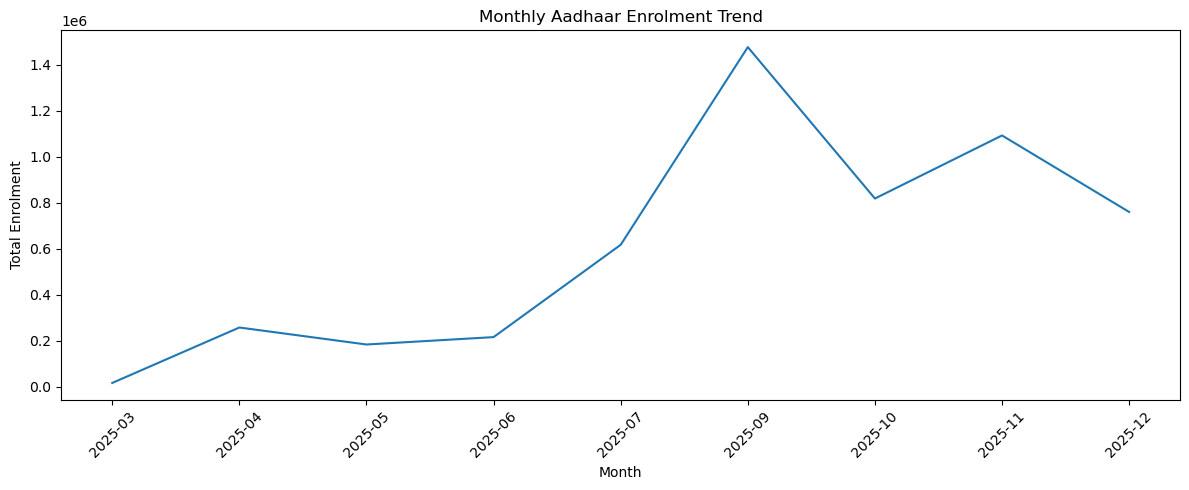

In [21]:
# Monthly enrollment trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_trend["month"], monthly_trend["total_enrollment"])
plt.xticks(rotation=45)
plt.title("Monthly Aadhaar Enrolment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrolment")
plt.tight_layout()
plt.show()


In [22]:
# Growth rate of enrollment and adding missing months to calculate 3 months average
monthly_trend["month"] = pd.PeriodIndex(monthly_trend["month"], freq="M")
monthly_trend = monthly_trend.sort_values("month")
full_months = pd.period_range(
    start=monthly_trend["month"].min(),
    end=monthly_trend["month"].max(),
    freq="M"
)
monthly_trend = (
    monthly_trend
    .set_index("month")
    .reindex(full_months)
    .rename_axis("month")
    .reset_index()
)
monthly_trend["total_enrollment"] = (
    monthly_trend["total_enrollment"].replace(0, np.nan)
)
monthly_trend = monthly_trend.sort_values("month")

monthly_trend["growth_rate"] = (
    monthly_trend["total_enrollment"].pct_change(fill_method=None) * 100
)

monthly_trend["3_month_avg_growth"] = (
    monthly_trend["growth_rate"]
    .rolling(window=3, min_periods=3)
    .mean()
)

monthly_trend["growth_rate"] = (
    monthly_trend["growth_rate"].clip(-200, 200)
)


monthly_trend

,month,total_enrollment,growth_rate,3_month_avg_growth
0,2025-03,16582.0,NaN,NaN
1,2025-04,257438.0,200.000000,NaN
2,2025-05,183616.0,-28.675642,NaN
3,2025-06,215734.0,17.491940,480.443691
4,2025-07,616868.0,185.939166,58.251821
5,2025-08,NaN,NaN,NaN
6,2025-09,1475867.0,NaN,NaN
7,2025-10,817919.0,-44.580440,NaN
8,2025-11,1091996.0,33.509064,NaN
9,2025-12,759464.0,-30.451760,-13.841045


In [23]:
# “To ensure accurate rolling growth analysis, missing months were explicitly added to the time series before computing growth rates
# and moving averages. This prevents misleading trends caused by non-consecutive time periods.”
# This line quantifies enrolment momentum over time, not just volume.
# “Three-month rolling averages were computed only for periods with three consecutive valid growth observations. Months with missing
# enrolment data naturally break the rolling window, preventing misleading trend smoothing.”
# “Aggregating Aadhaar enrolment at daily, weekly, and monthly levels reveals both operational fluctuations and long-term stabilization
# trends, supporting proactive capacity planning.”

# Question 4
Are there seasonal or periodic enrolment peaks?
Sudden peaks on specific dates
Patterns around months or weeks
💡 Why useful→ Predict peak load periods

In [24]:
daily_trend

,date,total_enrollment
0,2025-03-02,109
1,2025-03-09,3404
2,2025-03-15,3102
3,2025-03-20,6218
4,2025-03-23,576
...,...,...
87,2025-12-26,52398
88,2025-12-27,53023
89,2025-12-28,45685
90,2025-12-29,60684


In [25]:
# These dates represent unusually high demand
#Often caused by:
#Special enrolment drives
#Migration waves
#Awareness campaigns
#Administrative deadlines
peak_threshold = daily_trend["total_enrollment"].quantile(0.95)

daily_peaks = daily_trend[
    daily_trend["total_enrollment"] >= peak_threshold
]
daily_peaks

,date,total_enrollment
9,2025-04-01,257438
10,2025-05-01,183616
11,2025-06-01,215734
12,2025-07-01,616868
81,2025-12-15,138887


In [26]:
# Monthly enrollment pattern
monthly_pattern = (
    df5.groupby("month", as_index=False)["total_enrollment"]
      .mean()
)
monthly_pattern.sort_values(
    by="total_enrollment", ascending=False
)

,month,total_enrollment
4,2025-07,521.003378
3,2025-06,370.676976
2,2025-05,334.455373
1,2025-04,303.940968
0,2025-03,98.702381
8,2025-12,4.689294
5,2025-09,4.145100
7,2025-11,4.003109
6,2025-10,3.860257


In [27]:
# Creating week column by extracting week 
df5["week"] = df5["date"].dt.isocalendar().week

# Question 5
Which age group dominates Aadhaar enrolment?
Compare:0–5 vs 5–17 vs 18+
💡 Why useful→ Helps design age-specific enrolment strategies

In [28]:
df6 = df.copy()
df6

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrollment
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,51
...,...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0,2
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0,4
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0,1
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0,1


In [29]:
# Age group summary
age_group_summary = pd.DataFrame({
    "age_group": ["0-5", "5-17", "18+"],
    "total_enrollment": [
        df6["age_0_5"].sum(),
        df6["age_5_17"].sum(),
        df6["age_18_greater"].sum()
    ]
})
age_group_summary

,age_group,total_enrollment
0,0-5,3546965
1,5-17,1720383
2,18+,168136


In [30]:
age_group_summary.sort_values(
    by="total_enrollment",
    ascending=False
)

,age_group,total_enrollment
0,0-5,3546965
1,5-17,1720383
2,18+,168136


In [31]:
# Percentage contribution in total enrollment
age_group_summary["percentage"] = (
    age_group_summary["total_enrollment"]
    / age_group_summary["total_enrollment"].sum()
) * 100
age_group_summary

,age_group,total_enrollment,percentage
0,0-5,3546965,65.255734
1,5-17,1720383,31.650962
2,18+,168136,3.093303


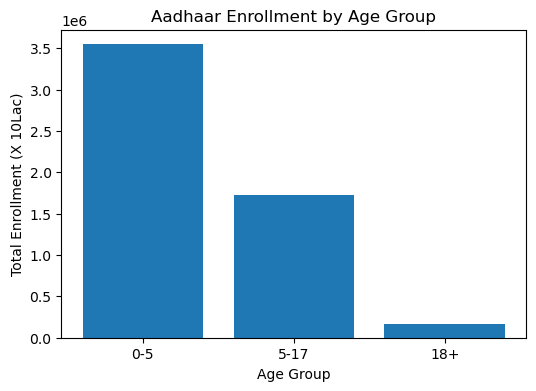

In [32]:
# If 18+ dominates Indicates:Adult enrolment Migration Corrections/late registrations If 0–5 or 5–17 is high
# Indicates: Strong birth or school-linked enrolment drives Good early-age coverage
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(
    age_group_summary["age_group"],
    age_group_summary["total_enrollment"]
)
plt.title("Aadhaar Enrollment by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Enrollment (X 10Lac)")
plt.show()

# Question 6
How does age-group enrolment vary by state?
Some states may have:
High child enrolment
Others high adult enrolment
💡 Why useful → Indicates demographic and policy differences

In [33]:
# State wise age enrollment
state_age_enrolment = (
    df6.groupby("state", as_index=False)
      .agg(
          enrol_0_5=("age_0_5", "sum"),
          enrol_5_17=("age_5_17", "sum"),
          enrol_18_plus=("age_18_greater", "sum")
      )
)
state_age_enrolment

,state,enrol_0_5,enrol_5_17,enrol_18_plus
0,Andaman & Nicobar Islands,479,32,0
1,Andhra Pradesh,112445,13746,1495
2,Arunachal Pradesh,1957,2236,151
3,Assam,141235,66085,22877
4,Bihar,262875,334802,11908
5,Chandigarh,2476,211,36
6,Chhattisgarh,82453,18769,1997
7,Dadra and Nagar Haveli and Daman and Diu,1497,250,52
8,Delhi,69183,22296,3050
9,Goa,1916,254,163


In [34]:
# Dominant age group state-wise
state_age_enrolment["dominant_age_group"] = (
    state_age_enrolment[
        ["enrol_0_5", "enrol_5_17", "enrol_18_plus"]
    ]
    .idxmax(axis=1)
)


state_age_enrolment["dominant_age_group"] = (
    state_age_enrolment["dominant_age_group"]
    .map({
        "enrol_0_5": "0–5",
        "enrol_5_17": "5–17",
        "enrol_18_plus": "18+"
    })
)
state_age_enrolment

,state,enrol_0_5,enrol_5_17,enrol_18_plus,dominant_age_group
0,Andaman & Nicobar Islands,479,32,0,0–5
1,Andhra Pradesh,112445,13746,1495,0–5
2,Arunachal Pradesh,1957,2236,151,5–17
3,Assam,141235,66085,22877,0–5
4,Bihar,262875,334802,11908,5–17
5,Chandigarh,2476,211,36,0–5
6,Chhattisgarh,82453,18769,1997,0–5
7,Dadra and Nagar Haveli and Daman and Diu,1497,250,52,0–5
8,Delhi,69183,22296,3050,0–5
9,Goa,1916,254,163,0–5


In [35]:
# Percentage share of each age group statewise
state_age_enrolment["total"] = (
    state_age_enrolment["enrol_0_5"] +
    state_age_enrolment["enrol_5_17"] +
    state_age_enrolment["enrol_18_plus"]
)

state_age_enrolment["pct_0_5"] = (
    state_age_enrolment["enrol_0_5"] / state_age_enrolment["total"] * 100
).round(2)

state_age_enrolment["pct_5_17"] = (
    state_age_enrolment["enrol_5_17"] / state_age_enrolment["total"] * 100
).round(2)

state_age_enrolment["pct_18_plus"] = (
    state_age_enrolment["enrol_18_plus"] / state_age_enrolment["total"] * 100
).round(2)
state_age_enrolment

,state,enrol_0_5,enrol_5_17,enrol_18_plus,dominant_age_group,total,pct_0_5,pct_5_17,pct_18_plus
0,Andaman & Nicobar Islands,479,32,0,0–5,511,93.74,6.26,0.00
1,Andhra Pradesh,112445,13746,1495,0–5,127686,88.06,10.77,1.17
2,Arunachal Pradesh,1957,2236,151,5–17,4344,45.05,51.47,3.48
3,Assam,141235,66085,22877,0–5,230197,61.35,28.71,9.94
4,Bihar,262875,334802,11908,5–17,609585,43.12,54.92,1.95
5,Chandigarh,2476,211,36,0–5,2723,90.93,7.75,1.32
6,Chhattisgarh,82453,18769,1997,0–5,103219,79.88,18.18,1.93
7,Dadra and Nagar Haveli and Daman and Diu,1497,250,52,0–5,1799,83.21,13.90,2.89
8,Delhi,69183,22296,3050,0–5,94529,73.19,23.59,3.23
9,Goa,1916,254,163,0–5,2333,82.13,10.89,6.99


In [36]:
# States with high child enrolment
# Strong birth/school-linked enrolment drives
# Younger population structure
# Better early-age inclusion
# States with high adult enrolment
# Migration-heavy states Urbanization
# Late registrations or demographic updates

# Question 7
Districts with unusually high child (0–5) enrolment
Compare child vs adult ratio
Spot outliers
💡 Why useful→ Indicates birth registration efficiency or special drives

In [37]:
# Child vs adult enrollment ratio
district_age = (
    df6.groupby(["state", "district"], as_index=False)
      .agg(
          child_0_5=("age_0_5", "sum"),
          adult_18_plus=("age_18_greater", "sum")
      )
)
district_age["child_adult_ratio"] = (
    district_age["child_0_5"] / district_age["adult_18_plus"]
)
district_age

,state,district,child_0_5,adult_18_plus,child_adult_ratio
0,Andaman & Nicobar Islands,Andamans,70,0,inf
1,Andaman & Nicobar Islands,Nicobar,64,0,inf
2,Andaman & Nicobar Islands,Nicobars,1,0,inf
3,Andaman & Nicobar Islands,North And Middle Andaman,128,0,inf
4,Andaman & Nicobar Islands,South Andaman,216,0,inf
...,...,...,...,...,...
1000,West Bengal,Uttar Dinajpur,18397,368,49.991848
1001,West Bengal,West Medinipur,1,0,inf
1002,West Bengal,West Midnapore,1647,3,549.000000
1003,West Bengal,hooghly,8,0,inf


In [38]:
# handling infinite values
district_age = district_age.replace([float("inf")], pd.NA).dropna()
district_age

,state,district,child_0_5,adult_18_plus,child_adult_ratio
5,Andhra Pradesh,Adilabad,1137,1,1137.0
6,Andhra Pradesh,Alluri Sitharama Raju,1105,34,32.5
7,Andhra Pradesh,Anakapalli,523,8,65.375
10,Andhra Pradesh,Ananthapuramu,3018,10,301.8
11,Andhra Pradesh,Annamayya,868,105,8.266667
...,...,...,...,...,...
994,West Bengal,Puruliya,9674,133,72.736842
996,West Bengal,South 24 Parganas,25039,304,82.365132
999,West Bengal,South Twenty Four Parganas,2978,4,744.5
1000,West Bengal,Uttar Dinajpur,18397,368,49.991848


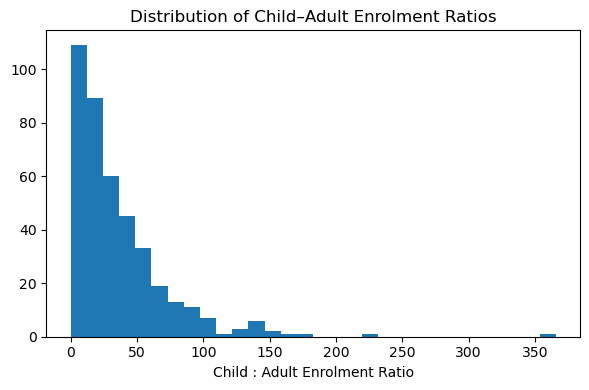

In [39]:
# Child adult ratio of total_enrollment
filtered = district_age[district_age["adult_18_plus"] >= 50]

plt.figure(figsize=(6,4))
plt.hist(filtered["child_adult_ratio"], bins=30)
plt.xlabel("Child : Adult Enrolment Ratio")
plt.title("Distribution of Child–Adult Enrolment Ratios")
plt.tight_layout()
plt.show()

In [40]:
# High child adult ratio
threshold = district_age["child_adult_ratio"].quantile(0.95)

high_child_districts = (
    district_age[
        district_age["child_adult_ratio"] >= threshold
    ]
    .sort_values(by="child_adult_ratio", ascending=False)
)
high_child_districts

,state,district,child_0_5,adult_18_plus,child_adult_ratio
548,Maharashtra,Raigarh,4414,1,4414.0
780,Tamil Nadu,Tirunelveli,8303,2,4151.5
183,Chhattisgarh,Janjgir-champa,4066,1,4066.0
19,Andhra Pradesh,Hyderabad,3831,1,3831.0
379,Karnataka,Bellary,3623,1,3623.0
378,Karnataka,Belgaum,5861,2,2930.5
14,Andhra Pradesh,Cuddapah,5519,2,2759.5
463,Madhya Pradesh,Dindori,2409,1,2409.0
35,Andhra Pradesh,Nellore,4611,2,2305.5
655,Odisha,Sambalpur,2255,1,2255.0


In [41]:
# These districts likely represent:Child-focused enrolment drives (schools, hospitals, anganwadis)
# Adult enrolment saturation (almost all adults already enrolled) Short reporting windows where adult enrolment didn’t occur
# Administrative batching (child enrolment reported separately)
# Possible reasons:
# Strong birth registration systems
# Hospital-linked Aadhaar enrolment
# Special child-focused enrolment drives
# Recent population growth
# These are positive indicators, not problems.

In [42]:
# As ratio is not reasonable, so choosing adult population>=50
district_age_clean = district_age[
    district_age["adult_18_plus"] >= 50
]

threshold = district_age_clean["child_adult_ratio"].quantile(0.95)

high_child_districts = (
    district_age_clean[
        district_age_clean["child_adult_ratio"] >= threshold
    ]
    .sort_values("child_adult_ratio", ascending=False)
)
high_child_districts

,state,district,child_0_5,adult_18_plus,child_adult_ratio
983,West Bengal,Murshidabad,31442,86,365.604651
992,West Bengal,Purba Medinipur,12954,58,223.344828
863,Uttar Pradesh,Bijnor,12935,73,177.191781
163,Bihar,Vaishali,8257,52,158.788462
788,Tamil Nadu,Vellore,8271,53,156.056604
784,Tamil Nadu,Tiruvallur,8712,58,150.206897
755,Tamil Nadu,Kancheepuram,9629,67,143.716418
128,Bihar,Darbhanga,10017,71,141.084507
979,West Bengal,Malda,11775,84,140.178571
123,Bihar,Begusarai,8106,58,139.758621


In [43]:
# Log reduction of ratios
district_age["child_adult_ratio"] = pd.to_numeric(
    district_age["child_adult_ratio"],
    errors="coerce"
)

district_age = district_age.replace([np.inf, -np.inf], np.nan)
district_age = district_age.dropna(subset=["child_adult_ratio"])

district_age["log_child_adult_ratio"] = np.log1p(
    district_age["child_adult_ratio"]
)

threshold = district_age["log_child_adult_ratio"].quantile(0.95)

high_child_districts = district_age[
    district_age["log_child_adult_ratio"] >= threshold
]

high_child_districts

# “To stabilize highly skewed ratio distributions, child–adult enrolment ratios were log-transformed after explicit numeric coercion
# and removal of infinite values, ensuring robust and interpretable comparisons.”

,state,district,child_0_5,adult_18_plus,child_adult_ratio,log_child_adult_ratio
5,Andhra Pradesh,Adilabad,1137,1,1137.000000,7.037028
14,Andhra Pradesh,Cuddapah,5519,2,2759.500000,7.923167
19,Andhra Pradesh,Hyderabad,3831,1,3831.000000,8.251142
31,Andhra Pradesh,Medak,1176,1,1176.000000,7.070724
35,Andhra Pradesh,Nellore,4611,2,2305.500000,7.743487
48,Andhra Pradesh,Vizianagaram,3695,3,1231.666667,7.116935
183,Chhattisgarh,Janjgir-champa,4066,1,4066.000000,8.310661
187,Chhattisgarh,Kawardha,1884,1,1884.000000,7.541683
191,Chhattisgarh,Koriya,1258,1,1258.000000,7.138073
196,Chhattisgarh,Mungeli,2600,2,1300.000000,7.170888


# Question 8
Are there sudden spikes in enrolment on specific dates?
One-day abnormal jumps
District/state-specific anomalies
💡 Why useful→ Could indicate:
Special enrolment drives
Migration events
Data reporting issues
Judges love anomaly detection.

In [44]:
daily_peaks

,date,total_enrollment
9,2025-04-01,257438
10,2025-05-01,183616
11,2025-06-01,215734
12,2025-07-01,616868
81,2025-12-15,138887


In [45]:
state_daily = (
    df6.groupby(["state", "date"], as_index=False)["total_enrollment"]
      .sum()
)
state_daily["state_threshold"] = (
    state_daily.groupby("state")["total_enrollment"]
    .transform(lambda x: x.quantile(0.95))
)


state_daily["spike_ratio"] = (
    state_daily["total_enrollment"] / state_daily["state_threshold"]
)

significant_spikes = state_daily[state_daily["spike_ratio"] >= 1.2]
significant_spikes

# Interpretation: 1.0 → exactly at spike threshold  > 1.2 → strong spike   < 1.0 → normal day
# “Since absolute spike thresholds vary widely across states due to population scale, spike intensity 
# was normalized by dividing daily enrolment by the state-specific threshold, enabling cross-state comparability.”

,state,date,total_enrollment,state_threshold,spike_ratio
0,Andaman & Nicobar Islands,01-09-2025,27,16.65,1.621622
61,Andaman & Nicobar Islands,28-12-2025,25,16.65,1.501502
123,Andhra Pradesh,22-12-2025,4431,3443.95,1.286604
150,Arunachal Pradesh,01-07-2025,484,117.15,4.131455
228,Assam,01-04-2025,25654,4066.80,6.308154
...,...,...,...,...,...
2665,Uttar Pradesh,01-07-2025,157866,25031.70,6.306643
2753,Uttarakhand,01-07-2025,2363,1131.85,2.087732
2837,West Bengal,01-07-2025,28544,9521.10,2.997973
2876,West Bengal,17-10-2025,12674,9521.10,1.331149


In [46]:
# Spike days
spike_counts = (
    significant_spikes
    .groupby("state")
    .size()
    .reset_index(name="spike_days")
    .sort_values("spike_days", ascending=False)
)

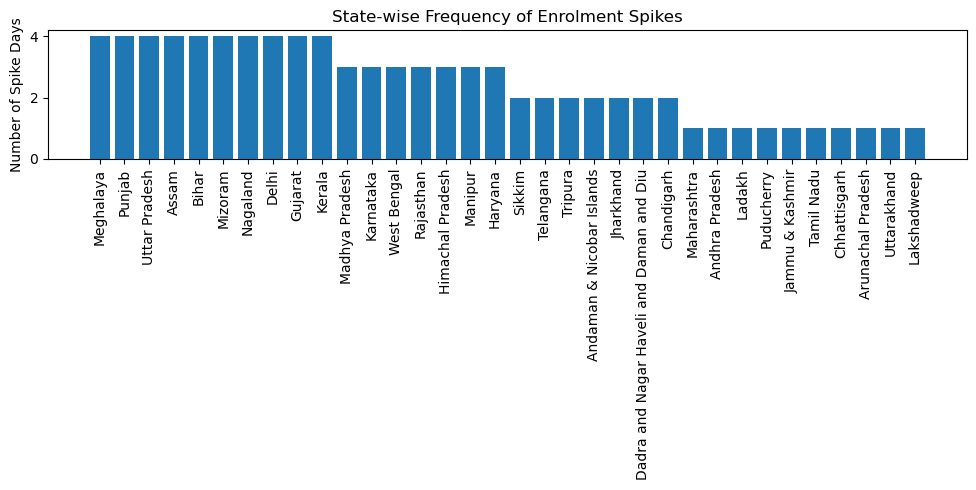

In [47]:
# State wise frequency of enrollment spikes 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(spike_counts["state"], spike_counts["spike_days"])
plt.xticks(rotation=90)
plt.ylabel("Number of Spike Days")
plt.title("State-wise Frequency of Enrolment Spikes")
plt.tight_layout()
plt.show()

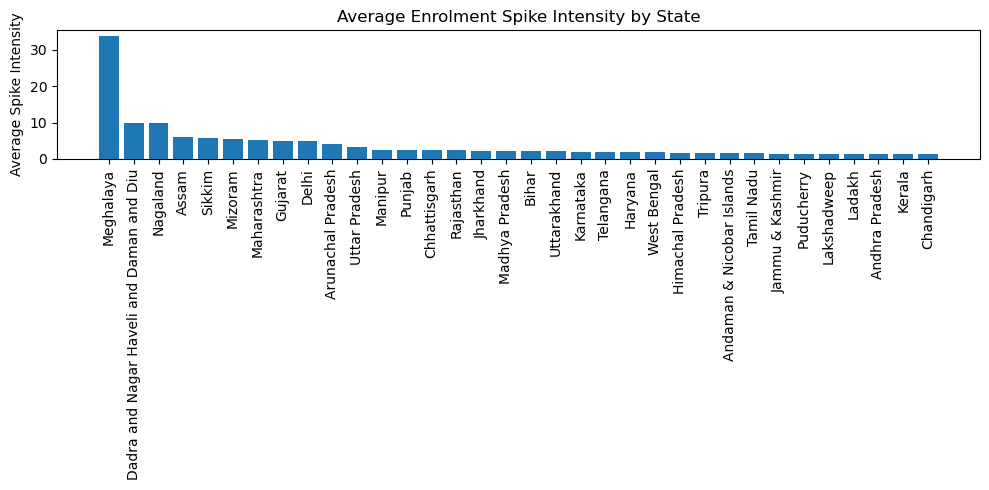

In [48]:
# Average enrollment spike Instensity by State
spike_severity = (
    significant_spikes
    .groupby("state")["spike_ratio"]
    .mean()
    .reset_index(name="avg_spike_intensity")
    .sort_values("avg_spike_intensity", ascending=False)
)
plt.figure(figsize=(10,5))
plt.bar(
    spike_severity["state"],
    spike_severity["avg_spike_intensity"]
)
plt.xticks(rotation=90)
plt.ylabel("Average Spike Intensity")
plt.title("Average Enrolment Spike Intensity by State")
plt.tight_layout()
plt.show()


In [49]:
# Top 5% district
district_daily = (
    df6.groupby(["state", "district", "date"], as_index=False)["total_enrollment"]
      .sum()
)

district_daily["district_threshold"] = (
    district_daily.groupby(["state", "district"])["total_enrollment"]
    .transform(lambda x: x.quantile(0.95))
)

district_spikes = district_daily[
    district_daily["total_enrollment"] >= district_daily["district_threshold"]
]
district_spikes

# Big spike menas:
# Could be special enrolment drives
# Could be migration or disaster-related movement
# Could be system/data reporting anomalies

,state,district,date,total_enrollment,district_threshold
3,Andaman & Nicobar Islands,Andamans,04-09-2025,3,3.0
13,Andaman & Nicobar Islands,Andamans,15-12-2025,3,3.0
16,Andaman & Nicobar Islands,Andamans,17-09-2025,3,3.0
18,Andaman & Nicobar Islands,Andamans,18-09-2025,4,3.0
22,Andaman & Nicobar Islands,Andamans,19-11-2025,3,3.0
...,...,...,...,...,...
65310,West Bengal,hooghly,28-12-2025,1,1.0
65311,West Bengal,hooghly,29-12-2025,1,1.0
65312,West Bengal,nadia,15-10-2025,1,1.0
65313,West Bengal,nadia,19-09-2025,1,1.0


# Question 9
Are there districts with consistently low enrolment?
Even with large population areas
💡 Why useful→ Signals accessibility or awareness gaps

In [50]:
# Low enrollment districts
district_summary = (
    df6.groupby(["state", "district"], as_index=False)
      .agg(
          total_enrolment=("total_enrollment", "sum"),
          active_days=("date", "nunique"),
          avg_daily_enrolment=("total_enrollment", "mean")
      )
)

active_districts = district_summary[
    district_summary["active_days"] >= 30
]

low_threshold = active_districts["avg_daily_enrolment"].quantile(0.10)

low_enrolment_districts = (
    active_districts[
        active_districts["avg_daily_enrolment"] <= low_threshold
    ]
    .sort_values(by="avg_daily_enrolment")
)
low_enrolment_districts

,state,district,total_enrolment,active_days,avg_daily_enrolment
971,West Bengal,Hugli,194,61,1.071823
20,Andhra Pradesh,K.V.Rangareddy,69,43,1.078125
299,Himachal Pradesh,Kinnaur,163,58,1.086667
155,Bihar,Samstipur,82,37,1.108108
0,Andaman & Nicobar Islands,Andamans,75,41,1.119403
...,...,...,...,...,...
737,Sikkim,East Sikkim,339,64,1.486842
444,Ladakh,Leh,125,47,1.488095
952,West Bengal,Bardhaman,1776,74,1.492437
430,Kerala,Idukki,1698,71,1.497354


In [51]:
# Possible reasons:
# Poor physical access to enrolment centres
# Low awareness
# Difficult geography
# Digital divide
# Administrative bottlenecks

# Question 10 
Child vs Adult enrolment ratio by district
(age_0_5 + age_5_17) / age_18_greater
💡 Why useful→ Helps identify education-linked or family-focused enrolment trends

In [52]:
# Child vs adult ratio by district
district_age_summary = (
    df6.groupby(["state", "district"], as_index=False)
      .agg(
          child_enrolment=("age_0_5", "sum"),
          school_age_enrolment=("age_5_17", "sum"),
          adult_enrolment=("age_18_greater", "sum")
      )
)

district_age_summary["total_child_enrolment"] = (
    district_age_summary["child_enrolment"] +
    district_age_summary["school_age_enrolment"]
)
district_age_summary["child_adult_ratio"] = (
    district_age_summary["total_child_enrolment"] /
    district_age_summary["adult_enrolment"]
)

district_age_summary

,state,district,child_enrolment,school_age_enrolment,adult_enrolment,total_child_enrolment,child_adult_ratio
0,Andaman & Nicobar Islands,Andamans,70,5,0,75,inf
1,Andaman & Nicobar Islands,Nicobar,64,11,0,75,inf
2,Andaman & Nicobar Islands,Nicobars,1,0,0,1,inf
3,Andaman & Nicobar Islands,North And Middle Andaman,128,4,0,132,inf
4,Andaman & Nicobar Islands,South Andaman,216,12,0,228,inf
...,...,...,...,...,...,...,...
1000,West Bengal,Uttar Dinajpur,18397,8127,368,26524,72.076087
1001,West Bengal,West Medinipur,1,1,0,2,inf
1002,West Bengal,West Midnapore,1647,540,3,2187,729.000000
1003,West Bengal,hooghly,8,2,0,10,inf


In [53]:
# handling infinite child adult ratio
district_age_summary = (
    district_age_summary
    .replace([float("inf"), -float("inf")], pd.NA)
    .dropna(subset=["child_adult_ratio"])
)
district_age_summary

,state,district,child_enrolment,school_age_enrolment,adult_enrolment,total_child_enrolment,child_adult_ratio
5,Andhra Pradesh,Adilabad,1137,281,1,1418,1418.0
6,Andhra Pradesh,Alluri Sitharama Raju,1105,116,34,1221,35.911765
7,Andhra Pradesh,Anakapalli,523,12,8,535,66.875
10,Andhra Pradesh,Ananthapuramu,3018,159,10,3177,317.7
11,Andhra Pradesh,Annamayya,868,48,105,916,8.72381
...,...,...,...,...,...,...,...
994,West Bengal,Puruliya,9674,3412,133,13086,98.390977
996,West Bengal,South 24 Parganas,25039,8197,304,33236,109.328947
999,West Bengal,South Twenty Four Parganas,2978,1125,4,4103,1025.75
1000,West Bengal,Uttar Dinajpur,18397,8127,368,26524,72.076087


In [54]:
# Top 10% child adult ratio
high_child_ratio_threshold = (
    district_age_summary["child_adult_ratio"].quantile(0.90)
)

high_child_ratio_districts = (
    district_age_summary[
        district_age_summary["child_adult_ratio"] >= high_child_ratio_threshold
    ]
    .sort_values(by="child_adult_ratio", ascending=False)
)
high_child_ratio_districts

,state,district,child_enrolment,school_age_enrolment,adult_enrolment,total_child_enrolment,child_adult_ratio
548,Maharashtra,Raigarh,4414,815,1,5229,5229.0
19,Andhra Pradesh,Hyderabad,3831,1008,1,4839,4839.0
780,Tamil Nadu,Tirunelveli,8303,1370,2,9673,4836.5
183,Chhattisgarh,Janjgir-champa,4066,572,1,4638,4638.0
379,Karnataka,Bellary,3623,596,1,4219,4219.0
...,...,...,...,...,...,...,...
952,West Bengal,Bardhaman,1345,428,3,1773,591.0
764,Tamil Nadu,Namakkal,4257,606,9,4863,540.333333
44,Andhra Pradesh,Srikakulam,4157,135,8,4292,536.5
318,Jammu & Kashmir,Kargil,388,141,1,529,529.0


In [55]:
# Trying ratio with adult ratio >=100
district_age_summary_filtered = district_age_summary[
    district_age_summary["adult_enrolment"] >= 100
]
district_age_summary_filtered

,state,district,child_enrolment,school_age_enrolment,adult_enrolment,total_child_enrolment,child_adult_ratio
11,Andhra Pradesh,Annamayya,868,48,105,916,8.72381
41,Andhra Pradesh,Spsr Nellore,1167,713,303,1880,6.20462
42,Andhra Pradesh,Sri Potti Sriramulu Nellore,689,622,303,1311,4.326733
45,Andhra Pradesh,Tirupati,802,689,228,1491,6.539474
80,Assam,Baksa,2120,1179,400,3299,8.2475
...,...,...,...,...,...,...,...
990,West Bengal,Paschim Medinipur,14240,3695,150,17935,119.566667
991,West Bengal,Purba Bardhaman,2523,390,128,2913,22.757812
994,West Bengal,Puruliya,9674,3412,133,13086,98.390977
996,West Bengal,South 24 Parganas,25039,8197,304,33236,109.328947


In [56]:
## High ratio districts:
# Strong school-linked enrolment
# Effective birth registration
# Younger population
# Family-centric awareness programs
# Low ratio districts:
# Migration-heavy
# Urban / industrial zones
# Adult correction or update-driven demand
# “District-level child–adult enrolment ratios reveal education- and family-focused enrolment patterns that are not visible from absolute counts alone. High-ratio districts indicate effective early-age coverage, while low-ratio districts reflect adult-centric enrolment driven by migration and corrections.”

In [57]:
# Adult enrolment is near zero
# This is the most common reason.
# Example:
# Child enrolment = 4,200
# Adult enrolment = 1
# Ratio = 4200 / 1 = 4200
# This inflates the ratio artificially.

# Special child-focused enrolment drives
# Possible real-world causes:
# Hospital-linked birth enrolment
# School admission–based Aadhaar drives
# Anganwadi or ICDS-linked enrolment
# Newborn Aadhaar campaigns
# These drives do not involve adults, so adult numbers stay low.

# Adult enrolments already saturated
# In some districts:
# Most adults already have Aadhaar
# Current activity is mostly for newborns
# This is actually a positive system maturity signal.

# Data reporting or aggregation artefacts
# Possible technical causes:
# Adult enrolment reported under updates, not enrolment
# District-level reporting lag
# Sparse adult data for selected dates
# “While most districts exhibit balanced child–adult enrolment ratios, a small number show extreme outliers (ratios >4000). Further inspection reveals these are driven by negligible adult enrolment volumes, suggesting either adult enrolment saturation or highly targeted child-focused drives rather than demographic imbalance.”

# Question 11
State-wise enrolment diversity Are enrolments balanced across age groups? Or dominated by one group? 💡 Why useful → Indicates system maturity

In [58]:
state_age = (
    df6.groupby("state", as_index=False)
      .agg(
          enrol_0_5=("age_0_5", "sum"),
          enrol_5_17=("age_5_17", "sum"),
          enrol_18_plus=("age_18_greater", "sum")
      )
)

In [59]:
state_age["total"] = (
    state_age["enrol_0_5"] +
    state_age["enrol_5_17"] +
    state_age["enrol_18_plus"]
)
state_age["pct_0_5"] = state_age["enrol_0_5"] / state_age["total"]
state_age["pct_5_17"] = state_age["enrol_5_17"] / state_age["total"]
state_age["pct_18_plus"] = state_age["enrol_18_plus"] / state_age["total"]
state_age["max_share"] = state_age[
    ["pct_0_5", "pct_5_17", "pct_18_plus"]
].max(axis=1)
state_age["max_share_group"] = state_age[
    ["pct_0_5", "pct_5_17", "pct_18_plus"]
].idxmax(axis=1)
state_age["diversity_type"] = state_age["max_share"].apply(
    lambda x: "Dominated" if x > 0.75 else "Balanced"
)
state_age

,state,enrol_0_5,enrol_5_17,enrol_18_plus,total,pct_0_5,pct_5_17,pct_18_plus,max_share,max_share_group,diversity_type
0,Andaman & Nicobar Islands,479,32,0,511,0.937378,0.062622,0.000000,0.937378,pct_0_5,Dominated
1,Andhra Pradesh,112445,13746,1495,127686,0.880637,0.107655,0.011708,0.880637,pct_0_5,Dominated
2,Arunachal Pradesh,1957,2236,151,4344,0.450506,0.514733,0.034761,0.514733,pct_5_17,Balanced
3,Assam,141235,66085,22877,230197,0.613540,0.287080,0.099380,0.613540,pct_0_5,Balanced
4,Bihar,262875,334802,11908,609585,0.431236,0.549229,0.019535,0.549229,pct_5_17,Balanced
5,Chandigarh,2476,211,36,2723,0.909291,0.077488,0.013221,0.909291,pct_0_5,Dominated
6,Chhattisgarh,82453,18769,1997,103219,0.798816,0.181837,0.019347,0.798816,pct_0_5,Dominated
7,Dadra and Nagar Haveli and Daman and Diu,1497,250,52,1799,0.832129,0.138966,0.028905,0.832129,pct_0_5,Dominated
8,Delhi,69183,22296,3050,94529,0.731871,0.235864,0.032265,0.731871,pct_0_5,Balanced
9,Goa,1916,254,163,2333,0.821260,0.108873,0.069867,0.821260,pct_0_5,Dominated


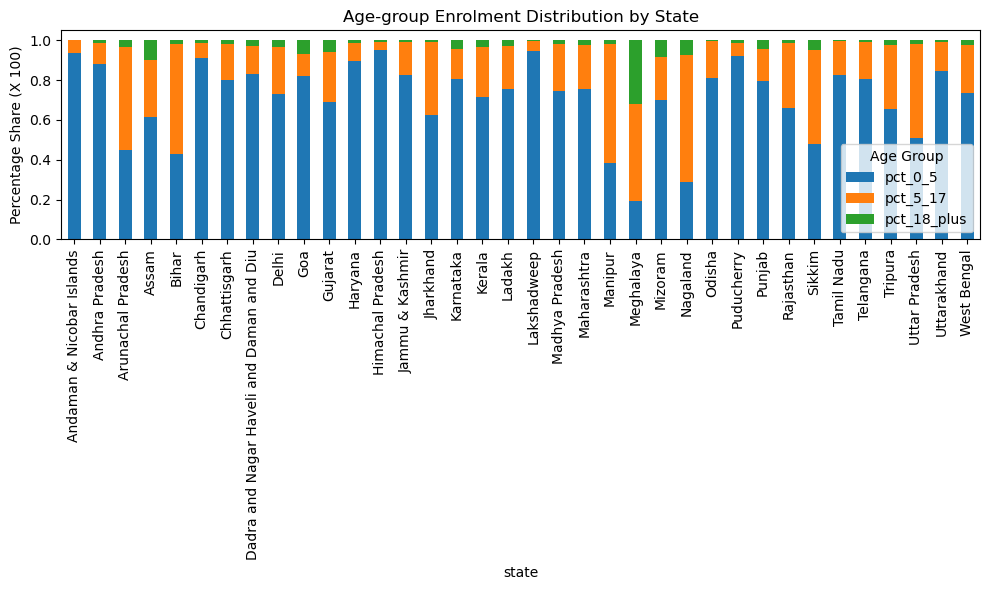

In [60]:
age_counts = state_age[["state", "pct_0_5", "pct_5_17", "pct_18_plus"]]
age_counts = age_counts.set_index("state")

age_counts.plot(kind="bar", stacked=True, figsize=(10,6))
plt.ylabel("Percentage Share (X 100)")
plt.title("Age-group Enrolment Distribution by State")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


In [61]:
# “State-wise enrolment diversity analysis shows that while some states exhibit balanced participation across age groups—indicating
# a mature and continuous enrolment system—others are heavily dominated by adult enrolments, reflecting migration-led demand and 
# highlighting opportunities for strengthening early-age Aadhaar coverage.”

# Question 12
Can we predict high-demand states/districts?
Based on recent trends
Moving averages or growth rates
💡 Why useful→ Proactive planning, not reactive

In [62]:
df7 = df.copy()

In [63]:
df7['date'] = pd.to_datetime( df7["date"],
    format="mixed",
    dayfirst=True,
    errors="coerce")
df7["month"] = df7["date"].dt.to_period("M")

state_monthly = (
    df7.groupby(["state", "month"])["total_enrollment"]
      .sum()
      .reset_index()
)

all_months = pd.period_range(
    start=state_monthly["month"].min(),
    end=state_monthly["month"].max(),
    freq="M"
)

state_monthly_complete = (
    state_monthly
    .set_index(["state", "month"])
    .groupby(level=0, group_keys=False)
    .apply(
        lambda x: x.reindex(
            pd.MultiIndex.from_product(
                [[x.index.get_level_values(0)[0]], all_months],
                names=["state", "month"]
            )
        )
    )
    .reset_index()
)


state_monthly_complete["total_enrollment"] = (
    state_monthly_complete["total_enrollment"].fillna(0)
)
state_monthly_complete.head(30)

,state,month,total_enrollment
0,Andaman & Nicobar Islands,2025-03,0.0
1,Andaman & Nicobar Islands,2025-04,0.0
2,Andaman & Nicobar Islands,2025-05,0.0
3,Andaman & Nicobar Islands,2025-06,0.0
4,Andaman & Nicobar Islands,2025-07,0.0
5,Andaman & Nicobar Islands,2025-08,0.0
6,Andaman & Nicobar Islands,2025-09,188.0
7,Andaman & Nicobar Islands,2025-10,82.0
8,Andaman & Nicobar Islands,2025-11,112.0
9,Andaman & Nicobar Islands,2025-12,129.0


In [64]:
import numpy as np

state_monthly_complete["enrollment_for_growth"] = (
    state_monthly_complete["total_enrollment"]
    .replace(0, np.nan)
)
state_monthly_complete["growth_rate"] = (
    state_monthly_complete
    .groupby("state")["enrollment_for_growth"]
    .pct_change(fill_method=None)
)
state_monthly_complete["ma_3_growth"] = (
    state_monthly_complete["growth_rate"]
    .rolling(3, min_periods=3)
    .mean()
)
state_monthly_complete

,state,month,total_enrollment,enrollment_for_growth,growth_rate,ma_3_growth
0,Andaman & Nicobar Islands,2025-03,0.0,NaN,NaN,NaN
1,Andaman & Nicobar Islands,2025-04,0.0,NaN,NaN,NaN
2,Andaman & Nicobar Islands,2025-05,0.0,NaN,NaN,NaN
3,Andaman & Nicobar Islands,2025-06,0.0,NaN,NaN,NaN
4,Andaman & Nicobar Islands,2025-07,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
355,West Bengal,2025-08,0.0,NaN,NaN,NaN
356,West Bengal,2025-09,119657.0,119657.0,NaN,NaN
357,West Bengal,2025-10,77892.0,77892.0,-0.349039,NaN
358,West Bengal,2025-11,79236.0,79236.0,0.017255,NaN


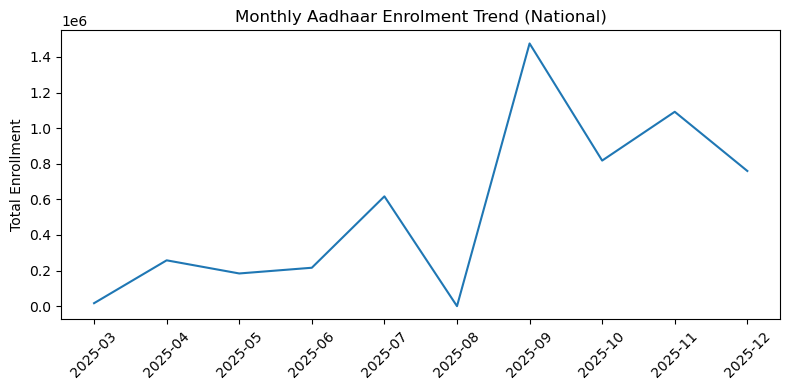

In [65]:
national_monthly = (
    state_monthly_complete
    .groupby("month")["total_enrollment"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(8,4))
plt.plot(national_monthly["month"].astype(str),
         national_monthly["total_enrollment"])
plt.xticks(rotation=45)
plt.ylabel("Total Enrollment")
plt.title("Monthly Aadhaar Enrolment Trend (National)")
plt.tight_layout()
plt.show()


In [66]:
recent_growth = (
    state_monthly_complete
    .dropna(subset=["growth_rate"])
    .groupby("state")
    .tail(3)
    .groupby("state")["growth_rate"]
    .mean()
    .reset_index(name="recent_avg_growth")
)

In [67]:
state_growth_summary = recent_growth.sort_values(
    "recent_avg_growth", ascending=False
)
state_growth_summary

,state,recent_avg_growth
10,Gujarat,0.101449
17,Ladakh,0.035380
13,Jammu & Kashmir,0.014458
0,Andaman & Nicobar Islands,-0.015397
32,Tripura,-0.025240
19,Madhya Pradesh,-0.025632
6,Chhattisgarh,-0.050573
5,Chandigarh,-0.051299
16,Kerala,-0.051973
14,Jharkhand,-0.054055


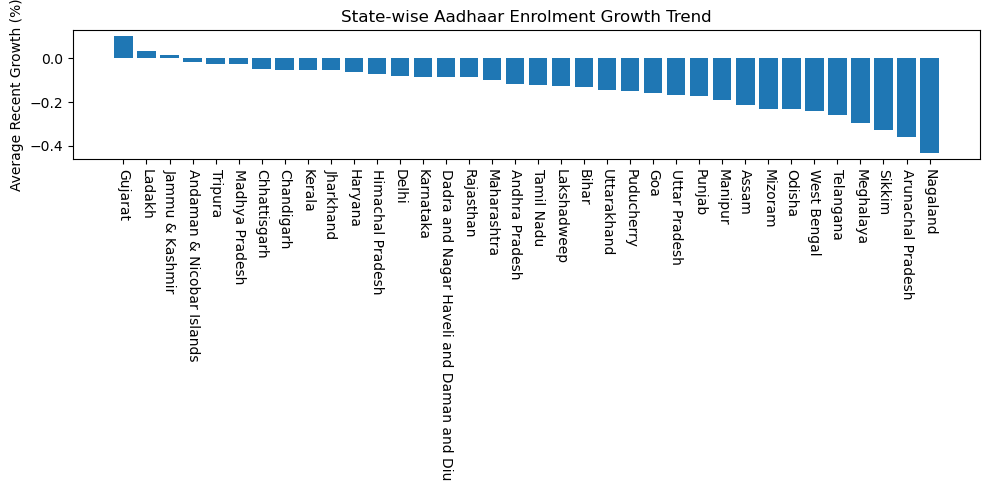

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(
    state_growth_summary["state"],
    state_growth_summary["recent_avg_growth"]
)
plt.xticks(rotation=270)
plt.ylabel("Average Recent Growth (%)")
plt.title("State-wise Aadhaar Enrolment Growth Trend")
plt.tight_layout()
plt.show()


In [69]:
recent_volume = (
    state_monthly_complete
    .groupby("state")
    .tail(3)
    .groupby("state")["total_enrollment"]
    .mean()
    .reset_index(name="recent_avg_enrollment")
)
state_trend_summary = recent_growth.merge(
    recent_volume, on="state", how="inner"
)
high_demand_states = state_trend_summary[
    (state_trend_summary["recent_avg_growth"] > 0) &
    (state_trend_summary["recent_avg_enrollment"] >
     state_trend_summary["recent_avg_enrollment"].quantile(0.75))
]
high_demand_states

,state,recent_avg_growth,recent_avg_enrollment
10,Gujarat,0.101449,34488.666667


In [70]:
# “State-wise growth trends were summarized using recent average growth rates computed from the last three valid monthly observations,
# ensuring robust comparison despite reporting gaps.”
# “By combining recent growth rates with moving-average trends, we identify states and districts likely to experience sustained
# high enrolment demand. This enables proactive capacity planning and targeted deployment of enrolment infrastructure, rather
# than reactive responses.”

## Key Takeaways

- Aadhaar enrolment patterns reflect system maturity more than continuous growth.
- Growth and demand signals vary significantly by state, supporting region-specific planning.
- Extreme child–adult ratios are driven by low adult enrolment rather than demographic imbalance.
- Percentile-based spike detection provides a scalable method for identifying abnormal enrolment activity.
